In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv
df = pd.read_csv('3D_spatial_network.txt', header = None)
df=df.drop(columns=[0])
df[1] = (df[1] - df[1].mean())/df[1].std()
df[2] = (df[2] - df[2].mean())/df[2].std()
df[3] = (df[3] - df[3].mean())/df[3].std()

n =len(df)

training_size = int(0.7 * n)
testing_size = int(0.3 * n)
training_size+=(n-(training_size+testing_size))

x1 = df.iloc[0:training_size, 0]
x2 = df.iloc[0:training_size, 1]
y = df.iloc[0:training_size, 2]

x1_test = df.iloc[training_size:n, 0]
x2_test = df.iloc[training_size:n, 1]
y_test = df.iloc[training_size:n, 2]
# print(x1)
# print(x1_test)

In [3]:
e2=[]
w0=0;w1=0;w2=0;nu=0.01
n = len(x1)
for i in range(training_size):
    y_predicted= w0 + w1*x1[i] + w2*x2[i]
    e2.append((1/2) * (y[i] - y_predicted) ** 2 )
    D_w0 = (-1) * (y[i] - y_predicted) 
    D_w1 = (-1) * (x1[i] * (y[i] - y_predicted))
    D_w2 = (-1) * (x2[i] * (y[i] - y_predicted))
    w0 = w0 - (nu * D_w0)
    w1 = w1 - (nu * D_w1)
    w2 = w2 - (nu * D_w2)

def rms(w0,w1,w2):
    y_predicted_test= w0 + w1*x1_test + w2*x2_test
    rmse=math.sqrt( (1/(2*testing_size)) * sum((y_test - y_predicted_test) ** 2 ) )
    r2=1-(sum(y_test - y_predicted_test) ** 2 )/(sum(y_test - y.mean()) ** 2 )
    return rmse,r2

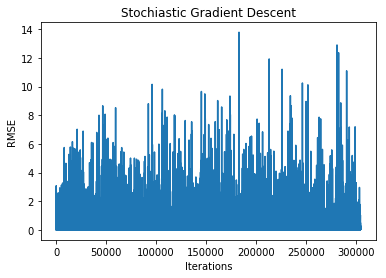

Using Stochastic Gradient Descent Method:
w0= 0.0021833349275501325 ,w1= 0.1440095011723801 ,w2= -0.057631640702873445
RMSE at last 2 iterations= 0.2433429219563485 0.22975723724057875
RMSE and R^2 in the testing set= (0.686545859492356, 0.5209591857475211)


In [4]:
iteration_list=[i for i in range(1,training_size)]
plt.plot(iteration_list,e2[1:training_size])
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Stochiastic Gradient Descent') 
# plt.figure(figsize=(2000,1000))
plt.show()
print("Using Stochastic Gradient Descent Method:")
print ("w0=",w0,",w1=",w1,",w2=",w2)
print ("RMSE at last 2 iterations=",e2[1998],e2[1999])
print ("RMSE and R^2 in the testing set=",rms(w0,w1,w2))